<h1>Funcao retirar random samples para variaveis desbalanceadas</h1>
<h1>Randomizar peso das variaveis/classes para achar a melhor. Simulacao rapida com amostra aleatoria</h1>
Organiza essa porra

In [916]:
import pandas as pd
import matplotlib.pyplot as plot
import sklearn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import axes3d
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [974]:
test = pd.read_csv('titanic/test.csv',index_col = 'PassengerId')

In [975]:
train = pd.read_csv('titanic/train.csv',index_col = 'passengerid')

In [976]:
test.columns = test.columns.str.lower()

In [977]:
test.columns = test.columns.str.lower()

In [979]:
train.head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3.0,"Heikkinen, Miss. Laina",women,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female_,35.0,1,0,113803,53.1000,C123,S
5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [981]:
train.head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3.0,"Heikkinen, Miss. Laina",women,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female_,35.0,1,0,113803,53.1000,C123,S
5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Table of Contents
1. [Tratamento dos dados](#example)
2. [Example2](#example2)
3. [Third Example](#third-example)

<div id='1'/>
<h1>1 Tratamento dos dados </h1>

<p>Dados a Ajustar<br>
    Age
    pclass
    sex
    cabin
    embarked
</p>

In [982]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
pclass      418 non-null int64
name        418 non-null object
sex         418 non-null object
age         332 non-null float64
sibsp       418 non-null int64
parch       418 non-null int64
ticket      418 non-null object
fare        417 non-null float64
cabin       91 non-null object
embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [983]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 363
Data columns (total 11 columns):
survived    936 non-null int64
pclass      927 non-null float64
name        936 non-null object
sex         890 non-null object
age         748 non-null float64
sibsp       936 non-null int64
parch       936 non-null int64
ticket      936 non-null object
fare        936 non-null float64
cabin       210 non-null object
embarked    934 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 87.8+ KB


<div id='1.1'/>
<h1>1.1 Age </h1>]

In [987]:
train['age'] = train.age.fillna(train.age.mean())

In [988]:
test['age'] = test.age.fillna(test.age.mean())

In [990]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 363
Data columns (total 11 columns):
survived    936 non-null int64
pclass      927 non-null float64
name        936 non-null object
sex         890 non-null object
age         936 non-null float64
sibsp       936 non-null int64
parch       936 non-null int64
ticket      936 non-null object
fare        936 non-null float64
cabin       210 non-null object
embarked    934 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 87.8+ KB


In [991]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
pclass      418 non-null int64
name        418 non-null object
sex         418 non-null object
age         418 non-null float64
sibsp       418 non-null int64
parch       418 non-null int64
ticket      418 non-null object
fare        417 non-null float64
cabin       91 non-null object
embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


<div id='1.2'/>
<h1>1.2 pclass </h1>

<p>Dropando registros vazios
</p>

In [997]:
train = train[train.pclass.notnull()]

In [998]:
test = test[test.pclass.notnull()]

<div id='1.3'/>
<h1>1.3 embarked </h1>

<p>Dropando registros vazios
</p>

In [1001]:
train = train[train.embarked.notnull()]

In [1002]:
test = test[test.embarked.notnull()]

<div id='1.3'/>
<h1>1.3 cabin </h1>

In [1014]:
cabinTrainX, 
cabinTestX, 
cabinTrainY, 
cabinTestY = train_test_split(cabin[cabin.level != -1],cabin[cabin.level != -1].level , test_size = 0.25, random_state = 0)

In [1015]:
## Obtain it from fare and pclass
cabin = train.loc[:,['cabin','fare','pclass']]

In [1016]:
def get_level(cabin):
    if 'A' in cabin:
        return 1
    if 'B' in cabin:
        return 1
    if 'C' in cabin:
        return 2
    if 'D' in cabin:
        return 2
    if 'E' in cabin:
        return 3
    if 'F' in cabin:
        return 3
    if 'G' in cabin:
        return 3
    if cabin == 'nan':
        return -1
    else:
        return -1
    

In [1017]:
cabin['level']=cabin.cabin.apply(lambda row : get_level(str(row)))

In [1018]:
cabin = cabin[cabin.pclass.notnull()]

In [1019]:
cabin.count()

cabin     200
fare      880
pclass    880
level     880
dtype: int64

[0, 4, 0, 300]

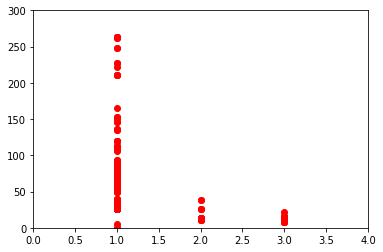

In [1020]:
plot.plot(cabin[cabin.level != -1].pclass,cabin[cabin.level != -1].fare,'ro')
plot.axis([0,4,0,300])

[0, 4, 0, 300]

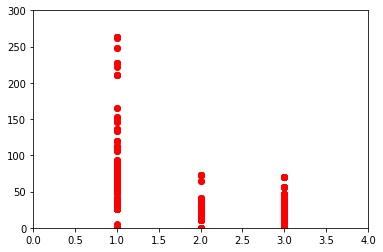

In [1021]:
# Impact of pclass on Fare
plot.plot(cabin[cabin.pclass != -1].pclass,cabin[cabin.pclass != -1].fare,'ro')
plot.axis([0,4,0,300])

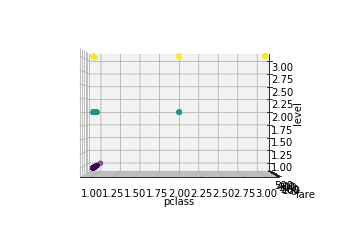

In [1022]:
fig = plot.figure()
ax = plot.axes(projection = '3d')
xdata = cabin[cabin.level != -1].pclass
ax.set_xlabel('pclass')
ydata = cabin[cabin.level != -1].fare
ax.set_ylabel('fare')
zdata = cabin[cabin.level != -1].level
ax.set_zlabel('level')
ax.scatter3D(xdata,ydata,zdata,c = zdata)
ax.view_init(0,-90)

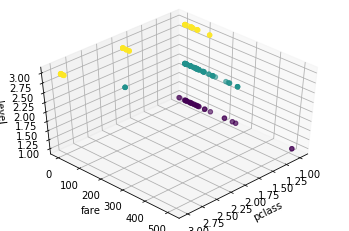

In [1023]:
ax.view_init(45,45)
fig

In [1024]:
# 4 people in level 7?
train[train.index.isin(cabin[cabin.level == 7].index.values)]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,


In [1025]:
train = train.drop_duplicates()

In [1026]:
test = test.drop_duplicates()

In [1027]:
train[train.index.value_counts()>1].sort_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,


In [1042]:
# 207 com level != -1
cabinTrainX, cabinTestX, cabinTrainY, cabinTestY = train_test_split(cabin[cabin.level != -1],cabin[cabin.level != -1].level , test_size = 0.25, random_state = 0)

In [1043]:
cabinTrainX = cabinTrainX[['fare','pclass']]

In [1044]:
cabinTestX = cabinTestX[['fare','pclass']]

In [1045]:
cabinTrainX = pd.concat([cabinTrainX,pd.get_dummies(cabinTrainX.pclass,drop_first = True)],axis = 1)

In [1046]:
cabinTestX = pd.concat([cabinTestX,pd.get_dummies(cabinTestX.pclass,drop_first = True)],axis = 1)

In [1047]:
cabinTrainX = cabinTrainX.drop(['pclass'],axis = 1)

In [1048]:
cabinTestX = cabinTestX.drop(['pclass'],axis = 1)

In [1049]:
cabinTrainX.head(5)

,fare,2.0,3.0
passengerid,,,
328,13.0000,1,0
880,83.1583,0,0
394,113.2750,0,0
453,27.7500,0,0
682,76.7292,0,0


In [1050]:
cabinTestX.head(5)

,fare,2.0,3.0
passengerid,,,
98,63.3583,0,0
746,71.0000,0,0
488,29.7000,0,0
436,120.0000,0,0
777,7.7500,0,1


In [1051]:
## KNN START ##

In [1052]:
b = pd.DataFrame(columns = ['k','score'])
score_old = 0
# Without
for i in range(1,10):
    # KNN Regressor
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(cabinTrainX,cabinTrainY.values.ravel())
    score_new = classifier.score(cabinTrainX,cabinTrainY.values.ravel())
    b = b.append({'k': i,'score' : score_new},ignore_index = True)
    if score_new > score_old:
        score_old = classifier.score(cabinTrainX,cabinTrainY.values.ravel())
print(score_old)

0.9194630872483222


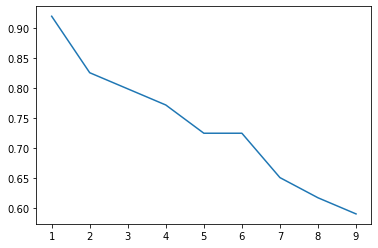

In [1053]:
plot.plot(b.k,b.score)

In [1054]:
y_pred = classifier.predict(cabinTestX)

In [704]:
y_pred

array([1, 1, 1, 3, 2, 2, 2, 2, 3, 2, 1, 2, 3, 3, 1, 2, 2, 3, 1, 1, 2, 3,
       2, 2, 1, 3, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 3, 2, 2, 1,
       3, 2, 2, 2, 3, 1, 3, 3], dtype=int64)

In [705]:
train['level']=train.cabin.apply(lambda row : get_level(str(row)))

In [706]:
train.level.value_counts().apply(lambda row: 100*row/train.level.count()).sort_index()

-1    77.216611
 1     6.958474
 2    10.325477
 3     5.499439
Name: level, dtype: float64

In [707]:
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(cabinTrainX,cabinTrainY.values.ravel())
classifier.score(cabinTrainX,cabinTrainY.values.ravel())

0.8129032258064516

In [708]:
y_pred

array([1, 1, 1, 3, 2, 2, 2, 2, 3, 2, 1, 2, 3, 3, 1, 2, 2, 3, 1, 1, 2, 3,
       2, 2, 1, 3, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 3, 2, 2, 1,
       3, 2, 2, 2, 3, 1, 3, 3], dtype=int64)

In [709]:
cabinTestY.head(5)

passengerid
62     1
352    2
175    1
22     2
717    2
Name: level, dtype: int64

In [710]:
print(confusion_matrix(cabinTestY, y_pred))
print(classification_report(cabinTestY, y_pred))

[[ 6  9  1]
 [ 7 13  3]
 [ 2  3  8]]
              precision    recall  f1-score   support

           1       0.40      0.38      0.39        16
           2       0.52      0.57      0.54        23
           3       0.67      0.62      0.64        13

    accuracy                           0.52        52
   macro avg       0.53      0.52      0.52        52
weighted avg       0.52      0.52      0.52        52



In [711]:
## KNN FINISH ##

In [712]:
## RANDOM FOREST START ##

In [713]:
rf_classifier = RandomForestClassifier(n_estimators= 20,criterion='entropy')

In [714]:
rf_classifier.fit(cabinTrainX,cabinTrainY.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [715]:
y_pred = rf_classifier.predict(cabinTestX)

In [716]:
print(confusion_matrix(cabinTestY.values, y_pred))
print(classification_report(cabinTestY.values, y_pred))

[[13  3  0]
 [ 5 17  1]
 [ 3  4  6]]
              precision    recall  f1-score   support

           1       0.62      0.81      0.70        16
           2       0.71      0.74      0.72        23
           3       0.86      0.46      0.60        13

    accuracy                           0.69        52
   macro avg       0.73      0.67      0.68        52
weighted avg       0.72      0.69      0.69        52



In [717]:
b = pd.DataFrame(columns = ['k','score'])
for i in range(1,60):
    # KNN Regressor
    rf_classifier = RandomForestClassifier(n_estimators= i,criterion='entropy')
    rf_classifier.fit(cabinTrainX,cabinTrainY.values.ravel())
    score_new = rf_classifier.score(cabinTrainX,cabinTrainY.values.ravel())
    b = b.append({'k': i,'score' : score_new},ignore_index = True)
    if score_new > score_old:
        score_old = classifier.score(cabinTrainX,cabinTrainY.values.ravel())
print(score_old)

0.8129032258064516


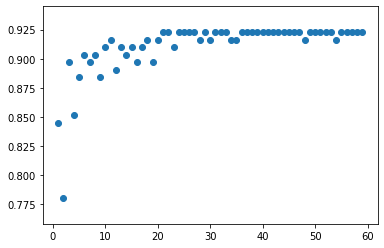

In [718]:
plot.scatter(b.k,b.score)

In [948]:
rf_classifier = RandomForestClassifier(n_estimators= 60,criterion='entropy')

TypeError: __init__() got an unexpected keyword argument 'multi_class'

In [720]:
rf_classifier.fit(cabinTrainX,cabinTrainY.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [721]:
y_pred = rf_classifier.predict(cabinTestX)

In [722]:
print(confusion_matrix(cabinTestY.values, y_pred))
print(classification_report(cabinTestY.values, y_pred))

[[13  3  0]
 [ 3 19  1]
 [ 1  4  8]]
              precision    recall  f1-score   support

           1       0.76      0.81      0.79        16
           2       0.73      0.83      0.78        23
           3       0.89      0.62      0.73        13

    accuracy                           0.77        52
   macro avg       0.79      0.75      0.76        52
weighted avg       0.78      0.77      0.77        52



In [723]:
rf_classifier.score(cabinTrainX,cabinTrainY.values.ravel())

0.9225806451612903

In [489]:
## LOGISTIC REGRESSION START ##

In [961]:
lr_classifier = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs', class_weight = 'balanced' )

In [962]:
lr_classifier.fit(cabinTrainX,cabinTrainY)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [963]:
y_pred = lr_classifier.predict(cabinTestX)

In [965]:
print(confusion_matrix(cabinTestY.values, y_pred))
print(classification_report(cabinTestY.values, y_pred, output_dict = True))

[[ 6  9  1]
 [11 11  1]
 [ 0  8  5]]
{'1': {'precision': 0.35294117647058826, 'recall': 0.375, 'f1-score': 0.3636363636363636, 'support': 16}, '2': {'precision': 0.39285714285714285, 'recall': 0.4782608695652174, 'f1-score': 0.4313725490196078, 'support': 23}, '3': {'precision': 0.7142857142857143, 'recall': 0.38461538461538464, 'f1-score': 0.5, 'support': 13}, 'accuracy': 0.4230769230769231, 'macro avg': {'precision': 0.4866946778711485, 'recall': 0.4126254180602007, 'f1-score': 0.43166963755199045, 'support': 52}, 'weighted avg': {'precision': 0.4609324499030381, 'recall': 0.4230769230769231, 'f1-score': 0.4276875085698615, 'support': 52}}


In [968]:
print(confusion_matrix(cabinTestY.values, y_pred))
rf_report = classification_report(cabinTestY.values, y_pred, output_dict = True)

[[ 6  9  1]
 [11 11  1]
 [ 0  8  5]]


<div id='1.4'/>
<h1>1.4 Dropando duplicados </h1>

In [1007]:
train = train.drop_duplicates()

In [1008]:
test = test.drop_duplicates()

In [1009]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 1 to 891
Data columns (total 11 columns):
survived    880 non-null int64
pclass      880 non-null float64
name        880 non-null object
sex         838 non-null object
age         880 non-null float64
sibsp       880 non-null int64
parch       880 non-null int64
ticket      880 non-null object
fare        880 non-null float64
cabin       200 non-null object
embarked    880 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 82.5+ KB


In [1010]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
pclass      418 non-null int64
name        418 non-null object
sex         418 non-null object
age         418 non-null float64
sibsp       418 non-null int64
parch       418 non-null int64
ticket      418 non-null object
fare        417 non-null float64
cabin       91 non-null object
embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


<div id='2'/>
<h1>2 ML Principal </h1>

<div id='2.1'/>
<h1>2.1 Separando dataset </h1>

In [1055]:
train.head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3.0,"Heikkinen, Miss. Laina",women,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female_,35.0,1,0,113803,53.1000,C123,S
5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [973]:
rf_report.get("1").get("f1-score")

0.3636363636363636

In [ ]:
## LOGISTIC REGRESSION END ##

In [724]:
# Returning results to data without level
train_2 = train[train.level == -1][['pclass','fare']]

In [725]:
# Ignoring few null pclass...
train_2 = train_2[train_2.pclass.notnull()]

In [726]:
train_2.head(5)

,pclass,fare
passengerid,,
1,3.0,7.2500
3,3.0,7.9250
5,3.0,8.0500
6,3.0,8.4583
8,3.0,21.0750


In [727]:
train_2 = pd.concat([train_2,pd.get_dummies(train_2.pclass,drop_first = True)],axis = 1)

In [728]:
train_2 = train_2.drop(['pclass'],axis = 1)

In [729]:
train_2.head(5)

,fare,2.0,3.0
passengerid,,,
1,7.2500,0,1
3,7.9250,0,1
5,8.0500,0,1
6,8.4583,0,1
8,21.0750,0,1


In [730]:
# Predicting level where it was null
y_pred_real = rf_classifier.predict(train_2)

In [731]:
y_pred_real

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 1, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2,

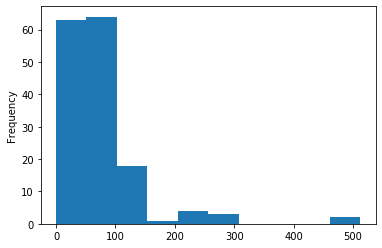

In [732]:
pd.Series(cabinTrainX.fare).plot.hist()

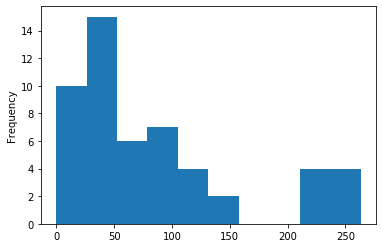

In [733]:
pd.Series(cabinTestX.fare).plot.hist()

In [734]:
train_2['pred_level'] = y_pred_real

In [735]:
# Returning it to original data
train_3 = pd.merge(train,train_2[['pred_level']],on='passengerid')

In [736]:
train_3

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,level,pred_level
passengerid,,,,,,,,,,,,,
1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-1,3
3,1,3.0,"Heikkinen, Miss. Laina",women,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-1,3
5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-1,3
6,0,3.0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,-1,3
8,0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,-1,3
9,1,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",woman,27.0,0,2,347742,11.1333,NaN,S,-1,3
10,1,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14.0,1,0,237736,30.0708,NaN,C,-1,3
13,0,3.0,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,-1,3
14,0,3.0,"Andersson, Mr. Anders Johan",man,39.0,1,5,347082,31.2750,NaN,S,-1,3


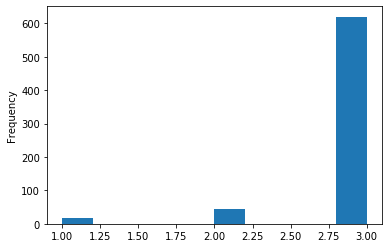

In [737]:
train_3.pred_level.plot.hist()

In [738]:
train_3 = train_3.drop(['level'], axis = 1)

In [739]:
train_3.columns.values[11] = 'level'

In [742]:
train_3.head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,level
passengerid,,,,,,,,,,,,
1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
3,1,3.0,"Heikkinen, Miss. Laina",women,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3
6,0,3.0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,3
8,0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3


In [890]:
train_3.count()

survived    681
pclass      681
name        681
sex         649
age         523
sibsp       681
parch       681
ticket      681
fare        681
cabin         1
embarked    681
level       681
dtype: int64

In [891]:
train[train.cabin.notnull()].count()

survived    204
pclass      202
name        204
sex         192
age         185
sibsp       204
parch       204
ticket      204
fare        204
cabin       204
embarked    202
level       204
dtype: int64

In [892]:
train_end = pd.concat([train[train.cabin.notnull()],train_3])

In [893]:
train_end.count()

survived    885
pclass      883
name        885
sex         841
age         708
sibsp       885
parch       885
ticket      885
fare        885
cabin       205
embarked    883
level       885
dtype: int64

In [894]:
train_end['age'] = train_end.age.fillna(train_3.age.mean())

In [895]:
train_end.drop(['cabin'],axis = 1)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,level
passengerid,,,,,,,,,,,
2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.000000,1,0,PC 17599,71.2833,C,2
4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female_,35.000000,1,0,113803,53.1000,S,2
7,0,1.0,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,3
11,1,3.0,"Sandstrom, Miss. Marguerite Rut",Female,4.000000,1,1,PP 9549,16.7000,S,3
12,1,1.0,"Bonnell, Miss. Elizabeth",women,58.000000,0,0,113783,26.5500,S,2
22,1,2.0,"Beesley, Mr. Lawrence",male,34.000000,0,0,248698,13.0000,S,2
24,1,1.0,"Sloper, Mr. William Thompson",mal,28.000000,0,0,113788,35.5000,S,1
28,0,1.0,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S,2
32,1,1.0,"Spencer, Mrs. William Augustus (Marie Eugenie)",Female,27.916348,1,0,PC 17569,146.5208,C,1


In [896]:
train_end = train_end.drop(['cabin'],axis = 1)

In [897]:
train_end.count()

survived    885
pclass      883
name        885
sex         841
age         885
sibsp       885
parch       885
ticket      885
fare        885
embarked    883
level       885
dtype: int64

In [898]:
train_end.sex = train_end.sex.str.strip()

In [899]:
train_end

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,level
passengerid,,,,,,,,,,,
2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.000000,1,0,PC 17599,71.2833,C,2
4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female_,35.000000,1,0,113803,53.1000,S,2
7,0,1.0,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,3
11,1,3.0,"Sandstrom, Miss. Marguerite Rut",Female,4.000000,1,1,PP 9549,16.7000,S,3
12,1,1.0,"Bonnell, Miss. Elizabeth",women,58.000000,0,0,113783,26.5500,S,2
22,1,2.0,"Beesley, Mr. Lawrence",male,34.000000,0,0,248698,13.0000,S,2
24,1,1.0,"Sloper, Mr. William Thompson",mal,28.000000,0,0,113788,35.5000,S,1
28,0,1.0,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S,2
32,1,1.0,"Spencer, Mrs. William Augustus (Marie Eugenie)",Female,27.916348,1,0,PC 17569,146.5208,C,1


In [900]:
train_end[(train_end.sex != 'male') & (train_end.sex != 'female')].sex.value_counts()

mal        82
Male       82
man        82
woman      45
female_    45
Female     44
women      43
Name: sex, dtype: int64

In [901]:
male_sex = ['Male','mal','man','male']
female_sex = ['woman','female_','Female','women','female']
def fix_sex(sex):
    if sex in male_sex:
        return 'male'
    if sex in female_sex:
        return 'female'
    else:
        return 'fail'

In [902]:
train_end

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,level
passengerid,,,,,,,,,,,
2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.000000,1,0,PC 17599,71.2833,C,2
4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female_,35.000000,1,0,113803,53.1000,S,2
7,0,1.0,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,3
11,1,3.0,"Sandstrom, Miss. Marguerite Rut",Female,4.000000,1,1,PP 9549,16.7000,S,3
12,1,1.0,"Bonnell, Miss. Elizabeth",women,58.000000,0,0,113783,26.5500,S,2
22,1,2.0,"Beesley, Mr. Lawrence",male,34.000000,0,0,248698,13.0000,S,2
24,1,1.0,"Sloper, Mr. William Thompson",mal,28.000000,0,0,113788,35.5000,S,1
28,0,1.0,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S,2
32,1,1.0,"Spencer, Mrs. William Augustus (Marie Eugenie)",Female,27.916348,1,0,PC 17569,146.5208,C,1


In [903]:
train_end['sex'] = train_end.sex.apply(lambda row: fix_sex(row))

In [904]:
train_end.sex.value_counts()

male      544
female    297
fail       44
Name: sex, dtype: int64

In [905]:
train_end['new_sex'] = train_end.name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [906]:
relacao_titulo_sex = {
    "Capt":       "male",
    "Col":        "male",
    "Major":      "male",
    "Jonkheer":   "male",
    "Don":        "male",
    "Sir" :       "male",
    "Dr":         "male",
    "Rev":        "male",
    "the Countess":"female",
    "Dona":       "female",
    "Mme":        "female",
    "Mlle":       "female",
    "Ms":         "female",
    "Mr" :        "male",
    "Mrs" :       "female",
    "Miss" :      "female",
    "Master" :    "male",
    "Lady" :      "female"
}

#Mapeamento da nova coluna pelo dicionário criado acima
train_end.new_sex = train_end.new_sex.map(relacao_titulo_sex)

In [907]:
train_end = train_end.drop(['sex'],axis = 1)

In [909]:
train_end = train_end[train_end.embarked.notnull()]

In [913]:
train_end = train_end[train_end.pclass.notnull()]

In [915]:
train_end.count()

survived    881
pclass      881
name        881
age         881
sibsp       881
parch       881
ticket      881
fare        881
embarked    881
level       881
new_sex     881
dtype: int64